In [ ]:
# Copyright (c) 2017 Ben Poole & Friedemann Zenke
# MIT License -- see LICENSE for details
# 
# This file is part of the code to reproduce the core results of:
# Zenke, F., Poole, B., and Ganguli, S. (2017). Continual Learning Through
# Synaptic Intelligence. In Proceedings of the 34th International Conference on
# Machine Learning, D. Precup, and Y.W. Teh, eds. (International Convention
# Centre, Sydney, Australia: PMLR), pp. 3987–3995.
# http://proceedings.mlr.press/v70/zenke17a.html

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [21]:
datafile_name = "split_cifar10_data_path_int[omega_decay=sum,xi=0.001]_lr1.00e-03_ep60.pkl.gz"
# backup all_evals to disk
# all_evals = dict() # uncomment to delete on disk
data = utils.load_zipped_pickle( datafile_name )

In [22]:
colors = (sns.color_palette("deep"))
colors[2] = 'lightgray'

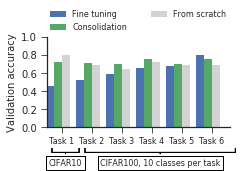

In [23]:
sns.set_style('ticks')
figure(figsize=(3.3, 2.2))
ax = axes()
cval = 0.01 # orig value
cvals = [0, cval, 'scratch']
# cvals = [cval]
# cvals = [0, cval]
n_tasks = 6
group_width = 0.8
bar_width = group_width/len(cvals)
bar_width = group_width/3
index = np.arange(n_tasks)
xtick_labels = ['Task %i'%(i+1) for i in range(n_tasks)]
# xtick_labels[0] = 'CIFAR10'

def do_plot(eval_type=0, age=-1):
    for k,cv in enumerate(cvals):
        means = []
        stdevs = []
        # print(cv)
        for tid in range(n_tasks):
            if cv=='scratch':
                a = tid
            else:
                a = age
            means.append( data['mean'][cv][a, tid, eval_type] )
            stdevs.append( data['std'][cv][a, tid, eval_type] )
        # print(means)
        
        bar(index+k*bar_width, means, width=bar_width, yerr=stdevs, color=colors[k], ecolor='gray')
        xticks(index)
        # gca().set_xticklabels()
        if eval_type==0:
            ylabel('Validation accuracy')
        else:
            ylabel('Training accuracy')
        xticks(index+group_width/2, xtick_labels,  fontsize=8)
        xlim(-0.1, 6.0)
        # ylim(0.5, 1.0)
        yticks(np.arange(0.0, 1.1, 0.2))
        legend(('Fine tuning', 'Consolidation', 'From scratch'), bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode='expand', borderaxespad=0., fontsize=8)
        
        ax.annotate('CIFAR10', xy=(0.27, 0.12), xytext=(0.27, 0.02), xycoords='figure fraction', 
            fontsize=8, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.7, lengthB=0.5', lw=1.0))

        ax.annotate('CIFAR100, 10 classes per task', xy=(0.66, 0.12), xytext=(0.66, 0.02), xycoords='figure fraction', 
            fontsize=8, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=9.4, lengthB=0.5', lw=1.0))

do_plot(eval_type=0)
sns.despine()
subplots_adjust(left=.21, bottom=.25, right=.98, top=.82)
savefig("cifar10_cifar100_transfer_valid.pdf")

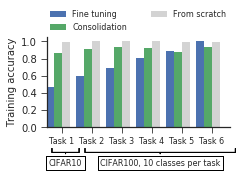

In [24]:
sns.set_style('ticks')
figure(figsize=(3.3, 2.2))
ax = axes()
do_plot(eval_type=1)
sns.despine()
subplots_adjust(left=.21, bottom=.25, right=.98, top=.82)
savefig("cifar10_cifar100_transfer_train.pdf")